In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "nPop"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,f1,grad,error,time_minutes,1,2,3,4,5,6
0,100,300,22.080939,20.840833,82.337576,506.027879,724.057043,863.724506,1494.151997,2501.075242
1,100,400,11.206138,20.519746,100.497620,566.173662,920.376812,992.669297,1589.715307,2543.356744
2,100,500,11.571120,20.669115,102.408174,608.517639,957.225891,1017.260703,1773.538165,2616.964166
3,100,600,15.548650,20.515133,111.906151,700.207775,1061.014160,1140.463389,1936.378746,3114.014408
4,100,700,24.477427,20.631473,109.624476,690.483591,994.450596,1019.572081,1971.939379,3750.816062


In [3]:
data.describe()

,f1,grad,error,time_minutes,1,2,3,4,5,6
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,250.000000,550.000000,25.389284,20.719429,116.170064,689.446830,1027.492431,1110.616511,1901.305141,3230.992544
std,114.208048,174.455675,9.282760,0.316623,13.208525,77.713903,105.983597,112.673741,196.623299,525.495339
min,100.000000,300.000000,11.206138,20.353575,82.337576,506.027879,724.057043,863.724506,1489.002563,2466.864653
25%,175.000000,400.000000,18.847699,20.495732,108.216696,654.989647,991.307135,1018.994236,1770.407490,2725.537152
50%,250.000000,550.000000,23.389274,20.668717,119.013756,714.909774,1054.606843,1140.735459,1978.488333,3127.402127
75%,325.000000,700.000000,29.932235,20.857247,126.257858,740.550349,1100.332446,1203.278497,2020.744952,3765.828544
max,400.000000,800.000000,45.079072,21.593356,133.126731,791.922916,1171.954798,1280.821888,2181.601542,3984.740796


### Grouping by first frequency

In [4]:
errors = data.drop(['time_minutes'], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)

errors.head()

,f1,grad,error
0,100,300,22.080939
1,100,400,11.206138
2,100,500,11.571120
3,100,600,15.548650
4,100,700,24.477427


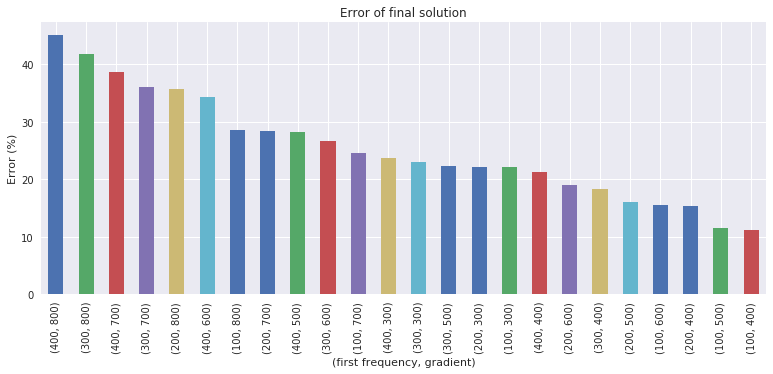

In [5]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (13,5)

ax = errors.sort_values(by="error", ascending=False).plot(kind="bar", x=['f1', 'grad'], y='error', legend=False)
plt.suptitle("")
plt.title("Error of final solution")
plt.xlabel("(first frequency, gradient)")
plt.ylabel("Error (%)")
plt.show()

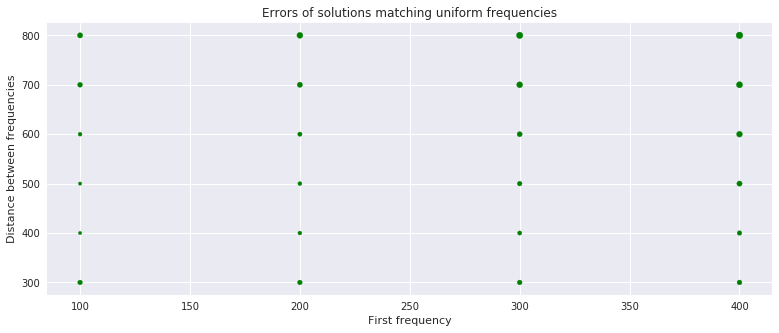

In [6]:
ax = errors.plot.scatter(x='f1', y='grad', s=errors['error'], c=['g' if x>10 else 'r' for x in errors['error']], sharex=False)
plt.xlabel("First frequency")
plt.ylabel("Distance between frequencies")
plt.title("Errors of solutions matching uniform frequencies")
plt.show()

In [64]:
sols = pd.read_csv("data.csv")
sols.drop(["time", "Unnamed: 0", "nPop", "freq"], axis=1, inplace=True)
sols.head()

,f1,fbest,grad,sol
0,100,[22.08093924],300,1000010010100000100000100000000000010000000010...
1,100,[11.20613773],400,1001010001000001111000010010110100000001100100...
2,100,[11.57112004],500,0011101110101011110110100001110100011100110001...
3,100,[15.54864978],600,1111111011110011111011101110011111000110010100...
4,100,[24.47742678],700,0111111100101110100110010101111110001001110101...


In [47]:
vox = [float(x) for x in sols['sol'][0]]

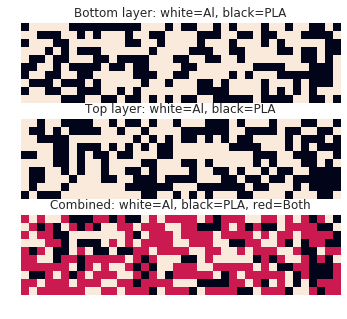

In [95]:
plt.subplot(311)

plt.imshow([vox[x::20] for x in range(0, 20, 2)])
plt.title("Bottom layer: white=Al, black=PLA")
plt.axis("off")

plt.subplot(312)
plt.imshow([vox[x::20] for x in range(1, 20, 2)])
plt.title("Top layer: white=Al, black=PLA")
plt.axis("off")

plt.subplot(313)
plt.imshow([[a + b for a, b in zip(vox[x+1::20], vox[x::20])] for x in range(0, 20, 2)])
plt.title("Combined: white=Al, black=PLA, red=Both")
plt.axis("off")

plt.show()

/home/byi649/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


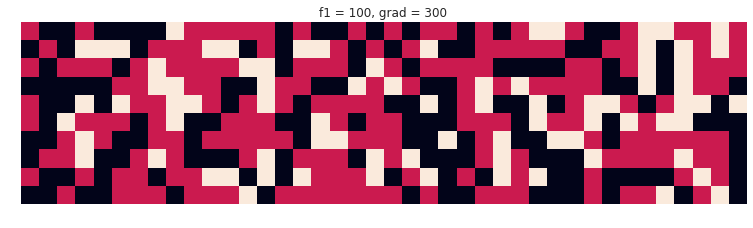

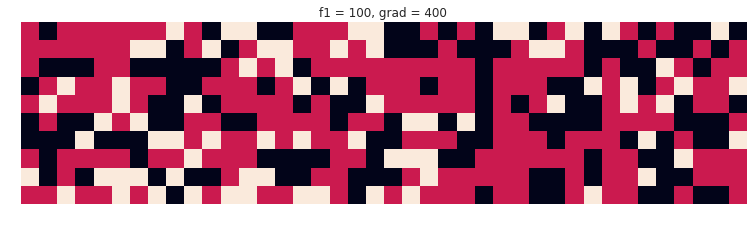

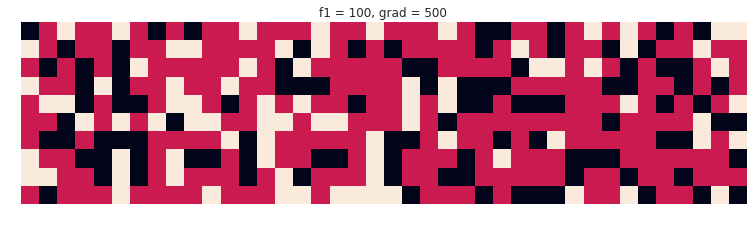

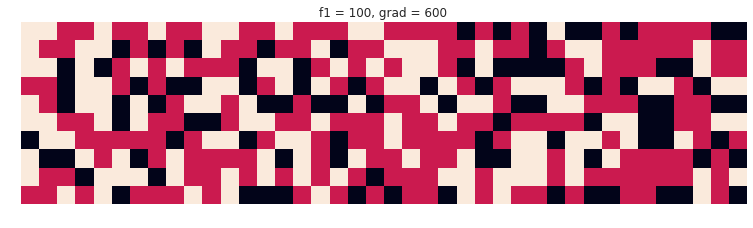

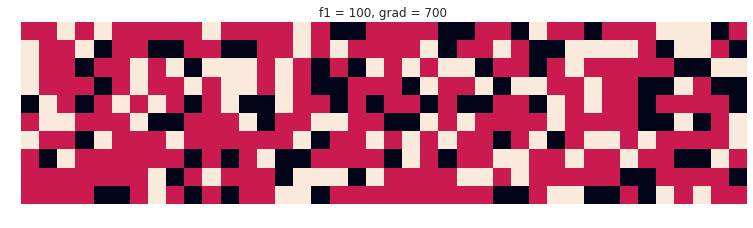

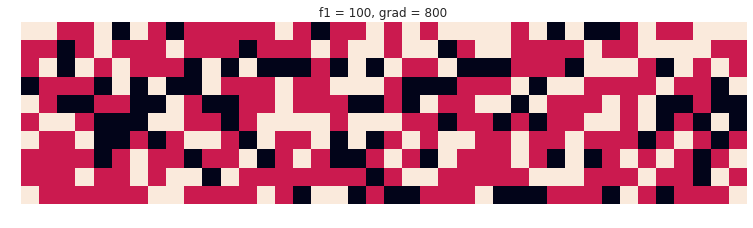

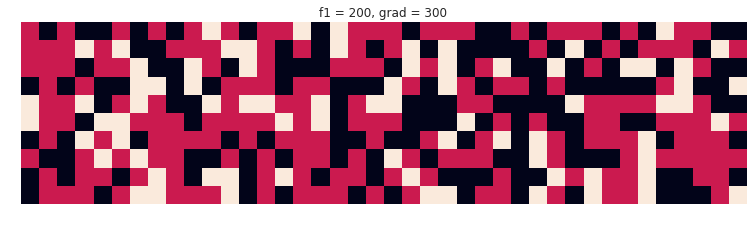

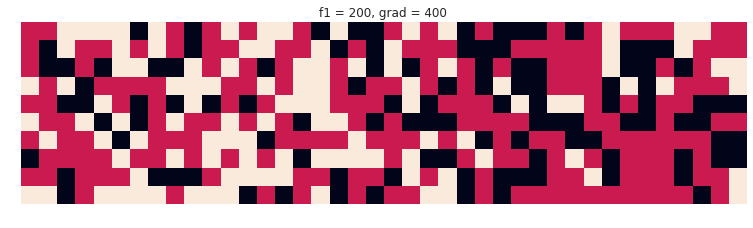

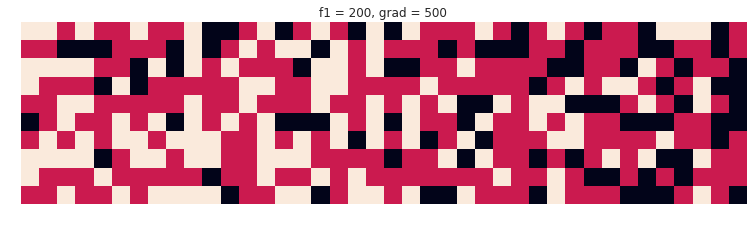

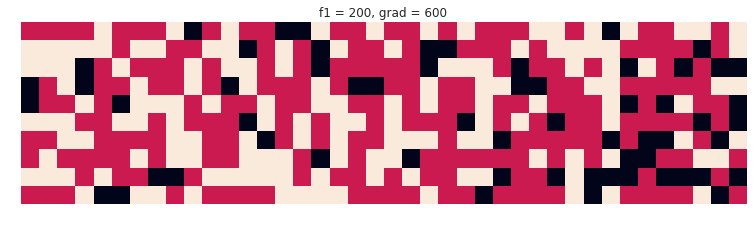

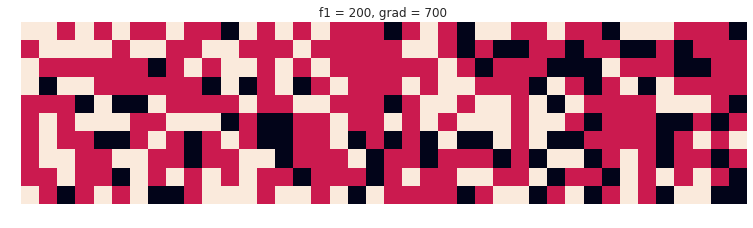

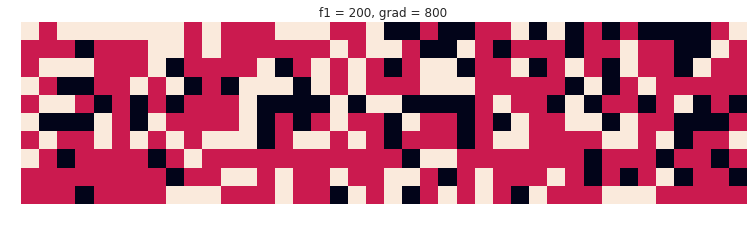

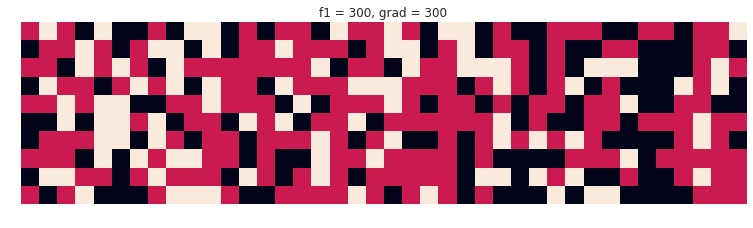

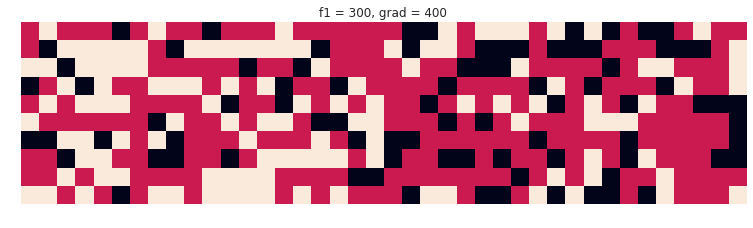

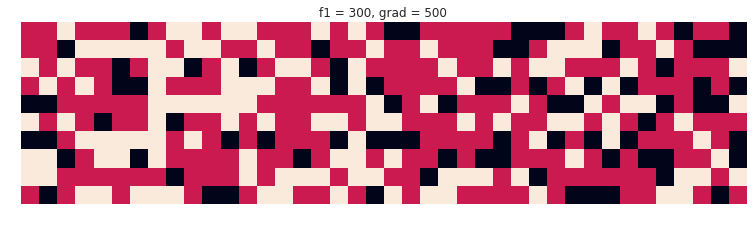

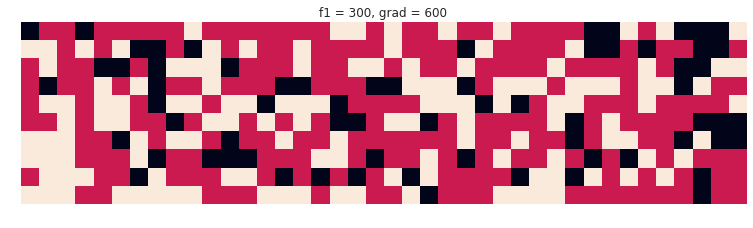

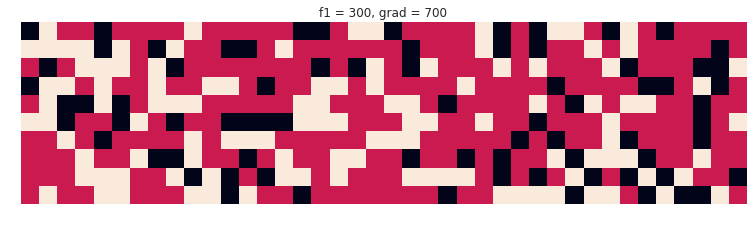

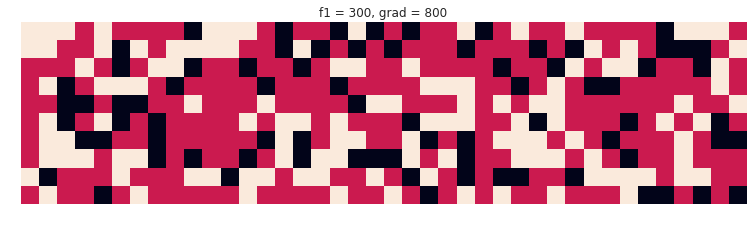

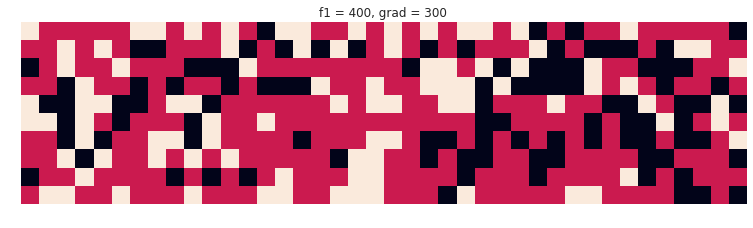

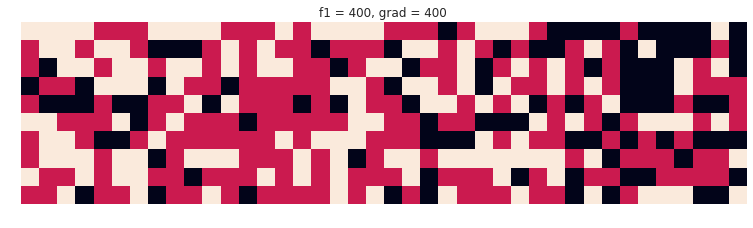

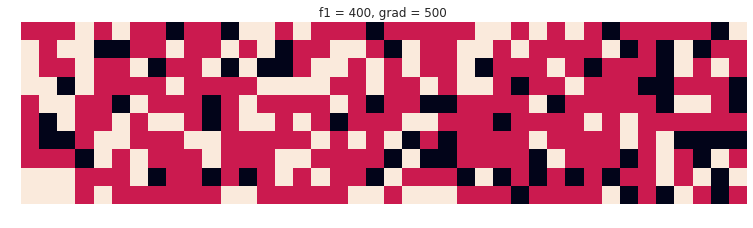

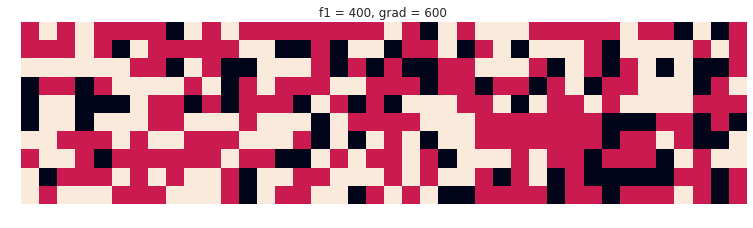

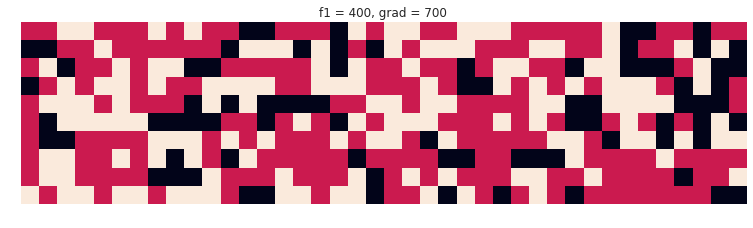

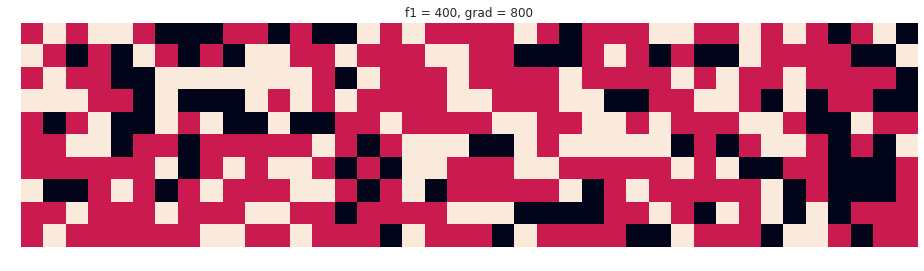

In [96]:
n = len(sols)
for s in range(n):
    plt.subplots()
    vox = [float(x) for x in sols['sol'][s]]
    plt.imshow([[a + b for a, b in zip(vox[x+1::20], vox[x::20])] for x in range(0, 20, 2)])
    plt.title("f1 = " + str(sols['f1'][s]) + ", grad = " + str(sols['grad'][s]))
    plt.axis("off")
    
plt.tight_layout()
plt.show()
